In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yaml, sys
from datetime import datetime 

In [2]:
sys.path.append('.')
from getDataFromMysql import getData
from temp_utils import adc2T

In [3]:
samples = yaml.load(open('samples/calibration.yml'), Loader=yaml.FullLoader)
sensor_maps = yaml.load(open('samples/sensor_map.yml'), Loader=yaml.FullLoader)

In [4]:
dset = samples['test2']
sensor_map = sensor_maps[dset['sensor_map']]

In [5]:
data = getData(dset['times'][-1])
data[0][10]

23.1584

In [6]:
def getRelativeTime(data, units='s'):
    dt_s = map(lambda x: (x-data[0][0]).total_seconds(), data[:,0])
    conv = {'s':1, 'm':60., 'h':3600}
    
    return np.array(dt_s)/conv[units]

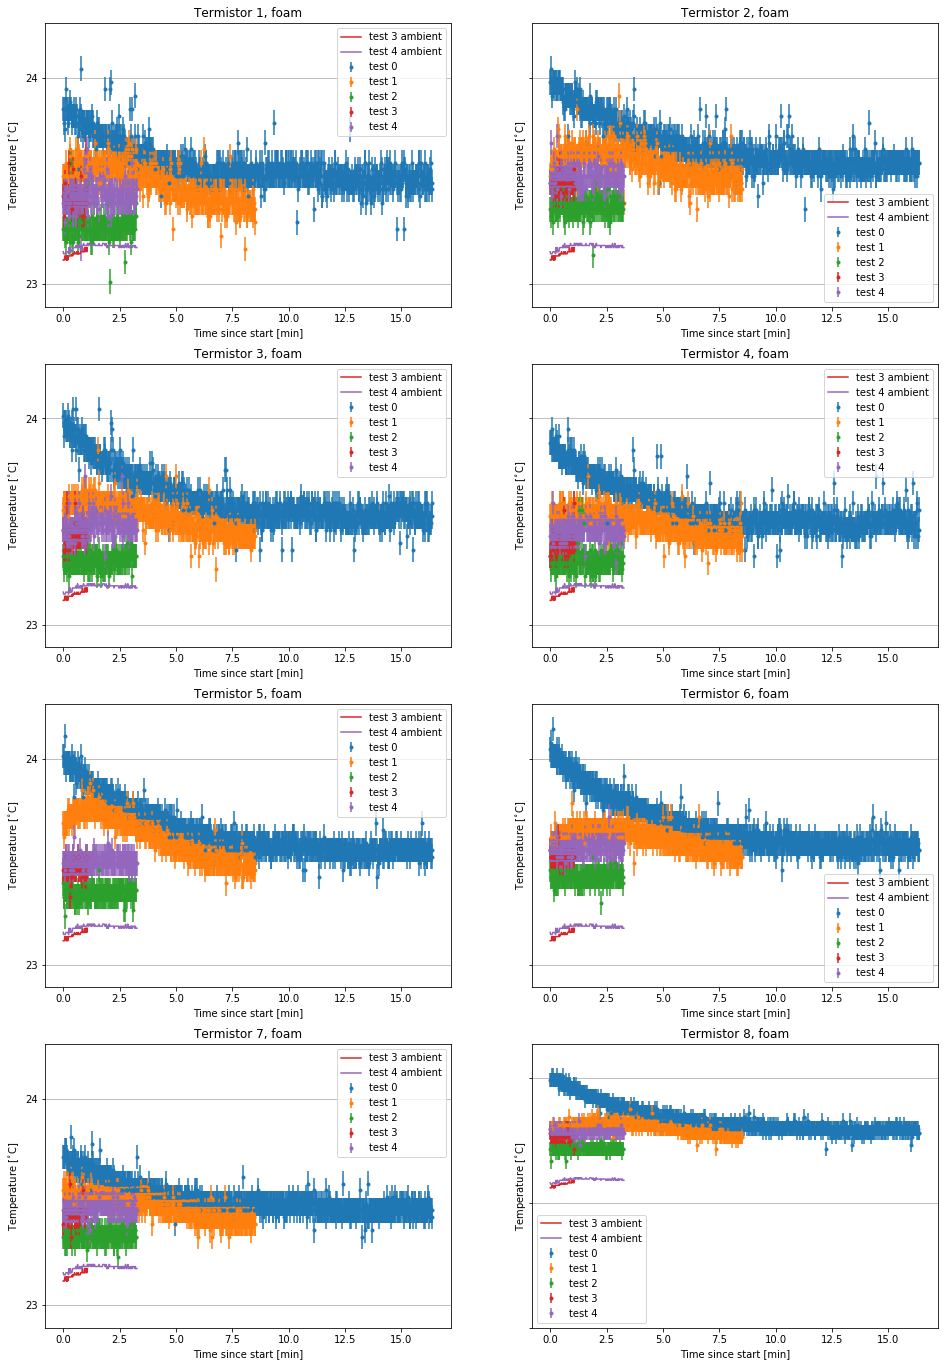

In [7]:
fig, ax = plt.subplots(4, 2,figsize=(8*2,6*4),
                       sharex=False, sharey=True
                      )

for i_t, times in enumerate(dset['times']):
    data = np.array(getData(times))
    
    t = getRelativeTime(data, 'm')
    
    for i in range(1, len(sensor_map)+1):
        T = adc2T(data[:,i])
        T_UP = adc2T(data[:,i]+1)
        err = np.hypot(T - T_UP, 0.05)
        
    
        label = 'test {}'.format(i_t)
        ax[(i-1)/2, (i-1)%2].errorbar(t, T, err, fmt='.', color='C'+str(i_t), label=label)
        if np.sum(data[:,10]) > 0:
            ax[(i-1)/2, (i-1)%2].plot(t, data[:,10], color='C'+str(i_t), label=label+' ambient')
        
        ax[(i-1)/2, (i-1)%2].set_title('Termistor {}, {}'.format(i, sensor_map[i-1]))
        if i_t == len(dset['times'])-1:
            ax[(i-1)/2, (i-1)%2].legend(loc='best')
            ax[(i-1)/2, (i-1)%2].set_xlabel('Time since start [min]')
            ax[(i-1)/2, (i-1)%2].set_ylabel(r'Temperature [$^{\circ}$C]')
            ax[(i-1)/2, (i-1)%2].grid(axis='y')
            low, up = ax[(i-1)/2, (i-1)%2].get_ylim()
            ax[(i-1)/2, (i-1)%2].set_yticks(np.arange(np.floor(low), np.ceil(up), 1.))
            